# 6.4 Machine Learning Part 1
### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [225]:
%matplotlib inline

In [226]:
# Folder location string
path = r'C:\Users\nurgul\Linkedin\02 Data\Prepared Data'

In [227]:
# Importing cleaned dataset
df = pd.read_csv('jobs_posts_clean_withInd.csv', index_col=False)

### 2. Data cleaning

In [228]:
df.columns

Index(['job_id', 'company_id', 'title', 'max_salary', 'min_salary',
       'work_type', 'location', 'applies', 'views', 'experience_level',
       'listed_time', 'approx_salary', 'name', 'company_size', 'state',
       'country', 'zip_code', 'skill_abr', 'salary_category',
       'applies_category', 'industry'],
      dtype='object')

In [229]:
df.head(20)

job_id  company_id                                 title  max_salary  \
0   3757935001    73013724                         Sales Manager    350000.0   
1   3757935001    73013724                         Sales Manager    350000.0   
2   3757934347    10515052                       Body Technician        30.0   
3   3757934347    10515052                       Body Technician        30.0   
4   3757934319    18391435                     Controls Engineer    150000.0   
5   3757934319    18391435                     Controls Engineer    150000.0   
6   3757934318     6577380                    CDL Class B Driver        27.0   
7   3757934318     6577380                    CDL Class B Driver        27.0   
8   3757934281        2238  Senior Manager, Indirect Procurement    143000.0   
9   3757934281        2238  Senior Manager, Indirect Procurement    143000.0   
10  3757934281        2238  Senior Manager, Indirect Procurement    143000.0   
11  3757934267       28352                 CDL A Delivery Driver    105000.0   
12  3757934267       28352                 CDL A Delivery Driver    105000.0   
13  3757934264    73013724                         Sales Manager    350000.0   
14  3757934264    73013724                         Sales Manager    350000.0   
15  3757934178    73013724                         Sales Manager    350000.0   
16  3757934178    73013724                         Sales Manager    350000.0   
17  3757934003    73013724                         Sales Manager    350000.0   
18  3757934003    73013724                         Sales Manager    350000.0   
19  3757933435    73013724                         Sales Manager    350000.0   

    min_salary  work_type           location    applies       views  \
0     125000.0  Full-time  Coeur d'Alene, ID  18.329151   66.426309   
1     125000.0  Full-time  Coeur d'Alene, ID  17.496124   61.180585   
2         20.0  Full-time       Waukesha, WI  26.281996   80.649722   
3         20.0  Full-time       Waukesha, WI  31.256076   96.929148   
4     121000.0  Full-time        Orlando, FL   1.000000    5.000000   
5     121000.0  Full-time        Orlando, FL   1.000000    5.000000   
6         25.0  Full-time        Oakland, CA  15.568389   56.874644   
7         25.0  Full-time        Oakland, CA  12.111901   46.531042   
8      96000.0  Full-time     Broomfield, CO  35.846667  148.485876   
9      96000.0  Full-time     Broomfield, CO  24.042735  102.208589   
10     96000.0  Full-time     Broomfield, CO  15.568389   56.874644   
11     85000.0  Full-time     Swedesboro, NJ  15.568389   56.874644   
12     85000.0  Full-time     Swedesboro, NJ  12.111901   46.531042   
13    125000.0  Full-time       Richmond, VA  18.329151   66.426309   
14    125000.0  Full-time       Richmond, VA  17.496124   61.180585   
15    125000.0  Full-time     Rapid City, SD  18.329151   66.426309   
16    125000.0  Full-time     Rapid City, SD  17.496124   61.180585   
17    125000.0  Full-time           Yuma, AZ  18.329151   66.426309   
18    125000.0  Full-time           Yuma, AZ  17.496124   61.180585   
19    125000.0  Full-time      Sheboygan, WI  18.329151   66.426309   

    experience_level  ... approx_salary                      name  \
0   Mid-Senior level  ...      237500.0                   J. Galt   
1   Mid-Senior level  ...      237500.0                   J. Galt   
2        Entry level  ...          25.0  Boyd Group Services Inc.   
3        Entry level  ...          25.0  Boyd Group Services Inc.   
4   Mid-Senior level  ...      135500.0         head-huntress.com   
5   Mid-Senior level  ...      135500.0         head-huntress.com   
6   Mid-Senior level  ...          26.0                 Conexwest   
7   Mid-Senior level  ...          26.0                 Conexwest   
8   Mid-Senior level  ...      119500.0                    Danone   
9   Mid-Senior level  ...      119500.0                    Danone   
10  Mid-Senior level  ...      119500.0                    Danone   
11     

In [230]:
df.shape

(19435, 21)

In [231]:
# Check for missing values
df.isnull().sum()
# No missing values to handle

job_id              0
company_id          0
title               0
max_salary          0
min_salary          0
work_type           0
location            0
applies             0
views               0
experience_level    0
listed_time         0
approx_salary       0
name                0
company_size        0
state               0
country             0
zip_code            0
skill_abr           0
salary_category     0
applies_category    0
industry            0
dtype: int64

In [232]:
dups = df.duplicated()
dups.shape # No dups

(19435,)

/var/folders/b1/dcgm49cs1dx0p3lkf95fklvr0000gp/T/ipykernel_29460/1394364783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['views'], bins=30) # Shows extreme values
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='views', ylabel='Density'>

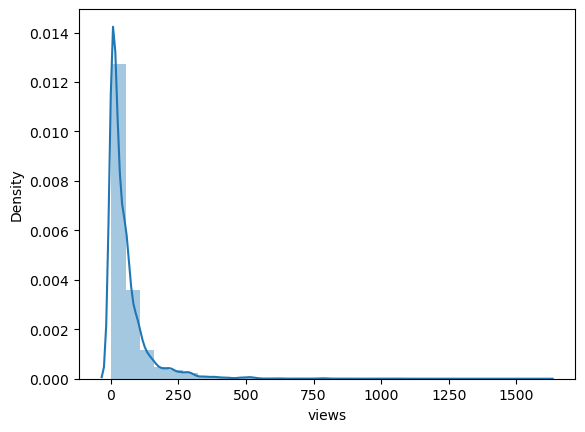

In [233]:
# Checking extremes 
sns.distplot(df['views'], bins=30) # Shows extreme values

In [234]:
df['views'].mean() # Check the mean

54.6121187062602

In [235]:
df['views'].median() # Check the median

27.0

In [236]:
df['views'].max() # Check the max

1599.0

### 3. Data prep for regression analysis

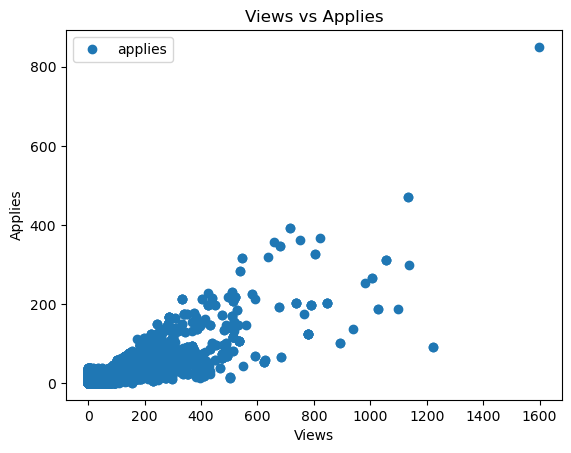

In [237]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x='views', y='applies', style='o') 
plt.title('Views vs Applies')  
plt.xlabel('Views')  
plt.ylabel('Applies')
plt.show()


In [238]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['views'].values.reshape(-1,1)
y = df['applies'].values.reshape(-1,1)

In [239]:
X

array([[66.42630854],
       [61.18058455],
       [80.649722  ],
       ...,
       [46.53104213],
       [46.53104213],
       [96.92914798]])

In [240]:
y

array([[18.32915058],
       [17.49612403],
       [26.28199566],
       ...,
       [12.11190053],
       [12.11190053],
       [31.25607587]])

In [241]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [242]:
# Create a regression object.

regression = LinearRegression() 

In [243]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [244]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

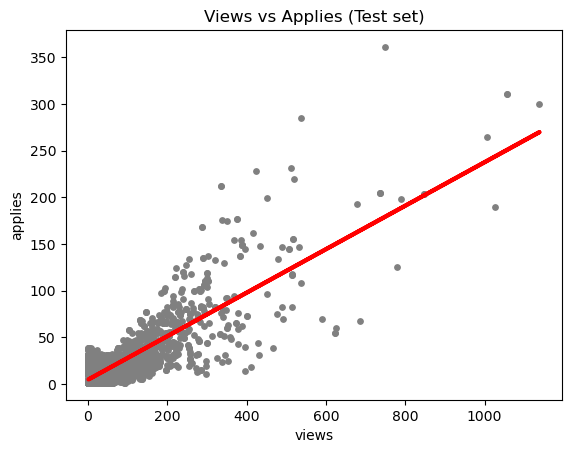

In [245]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Views vs Applies (Test set)')
plot_test.xlabel('views')
plot_test.ylabel('applies')
plot_test.show()

## Hypothesis: As the number of job post views increases, the corresponding application rate also increases.

In [246]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [247]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.23300844]]
Mean squared error:  190.05086149252608
R2 score:  0.635452913064146


The positive slope of approximately 0.233 suggests that there is a positive relationship between the number of views of job posts and the number of applications. As the number of views increases, there is an average increase of 0.233 in the number of job applications.

Mean Squared Error (MSE):
The mean squared error of 190.05 indicates the average squared difference between the actual and predicted number of job applications. 

R2 Score:
The R2 score of 0.635 means that approximately 63.5% of the variability in the number of job applications can be explained by the variability in the number of views. This suggests that the linear regression model captures a substantial portion of the relationship between views and applications.

I may assume that this preidictive model is a good fit 

In [248]:
y_predicted

array([[22.9998344 ],
       [18.71784852],
       [ 9.15304299],
       ...,
       [15.91028779],
       [ 9.61905987],
       [24.76460857]])

In [249]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0    24.096085  22.999834
1    16.543417  18.717849
2     1.000000   9.153043
3    33.000000  29.657786
4    18.329151  19.970765
5     2.000000  12.648170
6     4.000000  12.415161
7    22.000000  30.123803
8     7.000000  13.813212
9     4.000000   7.988001
10   15.568389  17.745146
11   19.000000  45.968377
12   18.000000  28.026727
13   26.281996  23.284940
14   18.000000  14.512237
15   12.111901   4.725883
16   15.568389   6.356942
17    2.000000   7.754992
18  110.000000  72.997356
19   15.000000  24.065583
20    3.000000  10.085077
21   10.228571   4.725883
22   14.700422  16.631975
23    2.000000   9.619060
24    7.000000  14.745246
25   30.000000  36.415031
26   73.000000  98.162268
27   21.411168  11.949144
28   14.700422  16.631975
29   33.000000  35.249988

predicted values are pretty far off of actual values in many cases. Still, I think this model is quite good to predict applies number by views 

In [250]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [251]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [252]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.23300844]]
Mean squared error:  249.77632091160888
R2 score:  0.6076532087122837


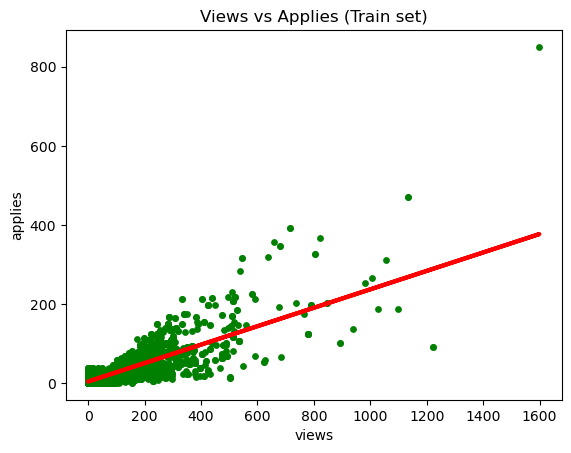

In [253]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Views vs Applies (Train set)')
plot_test.xlabel('views')
plot_test.ylabel('applies')
plot_test.show()

In [254]:
df.describe()

job_id    company_id      max_salary     min_salary  \
count  1.943500e+04  1.943500e+04    19435.000000   19435.000000   
mean   3.725445e+09  8.580080e+06    87699.577578   62182.249910   
std    4.650946e+07  1.979098e+07    87360.405542   58764.123285   
min    2.148435e+09  1.016000e+03       10.500000       7.250000   
25%    3.697345e+09  1.461100e+04       49.200000      40.000000   
50%    3.748841e+09  2.058560e+05    84000.000000   63200.000000   
75%    3.756168e+09  4.854165e+06   140000.000000  100000.000000   
max    3.757935e+09  1.007464e+08  1000000.000000  750000.000000   

            applies         views  approx_salary  company_size  
count  19435.000000  19435.000000   19435.000000  19435.000000  
mean      17.173936     54.612119   74940.913744      4.638477  
std       24.537991     83.521340   71586.683464      1.933902  
min        1.000000      1.000000      10.250000      1.000000  
25%        4.000000      7.000000      44.000000      3.000000  
50%       12.111901     27.000000   75000.000000      5.000000  
75%       20.000000     66.426309  120000.000000      7.000000  
max      850.000000   1599.000000  875000.000000      7.000000

### performance improvement after removing outliers 

In [273]:
df_test = df[df['views'] <=800] 

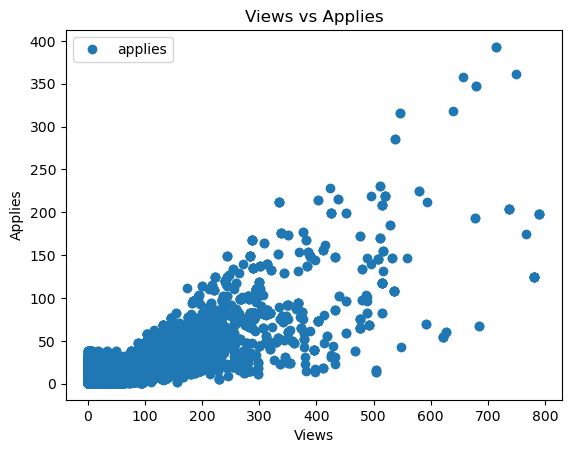

In [274]:
df_test.plot(x='views', y='applies', style='o') 
plt.title('Views vs Applies')  
plt.xlabel('Views')  
plt.ylabel('Applies')
plt.show()

In [275]:
# Reshape again.

X_2 = df_test['views'].values.reshape(-1,1)
y_2 = df_test['applies'].values.reshape(-1,1)

In [276]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [277]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [278]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [279]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [280]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.22008188]]
Mean squared error:  203.93859918012745
R2 score:  0.585813616900964


By excluding outliers, we observe that the Mean Squared Error (MSE) increased, suggesting that the predictive model fits the data better. However, it's worth mentioning that the R-squared (R2) score slightly decreased.

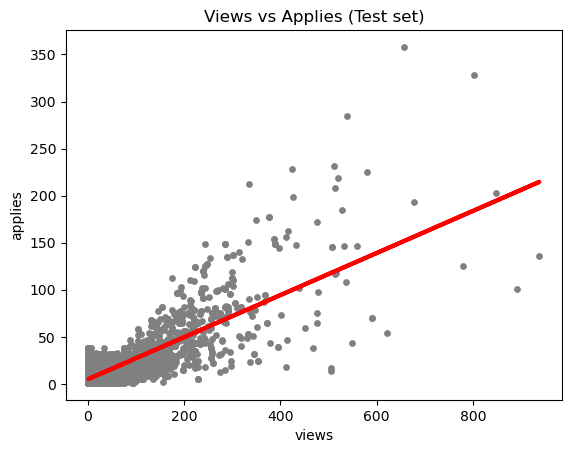

In [263]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Views vs Applies (Test set)')
plot_test.xlabel('views')
plot_test.ylabel('applies')
plot_test.show()

In [264]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

Actual  Predicted
0    10.000000  20.792873
1    18.329151  19.770423
2     2.000000   6.485665
3    47.000000  97.247015
4    15.568389   5.144364
5    17.496124   6.262115
6    15.568389  17.635148
7    15.568389   5.367914
8    26.281996  22.950069
9    24.042735   5.144364
10   18.329151  19.770423
11   18.329151  19.770423
12  116.000000  59.019944
13   45.000000  39.794633
14    2.000000   6.485665
15   26.281996   5.367914
16   10.228571  10.512935
17   24.000000  19.675122
18   26.281996  11.850868
19    8.000000  22.357724
20   26.281996  10.956667
21   10.228571  10.512935
22    3.000000   7.603415
23    2.000000   9.615367
24   31.256076   6.485665
25   16.543417   6.038565
26    4.000000   7.379865
27    4.000000  13.415719
28    2.000000   6.932765
29   26.281996   5.144364

again predicted values are pretty far off of actual values in many cases. Still, I think this model is quite good to predict applies number by views 